In [3]:
#basic data science modules
import numpy as np
import pandas as pd
import seaborn as sns

#plotly modules
import plotly
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.widgets import GraphWidget

#ipywidget modules
from ipywidgets import widgets 
from IPython.display import display, clear_output, Image

<IPython.core.display.Javascript object>

In [15]:
%matplotlib inline

In [16]:
coin_flip = pd.Series([0, 1])

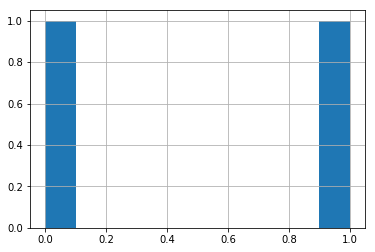

In [17]:
coin_flip.hist()

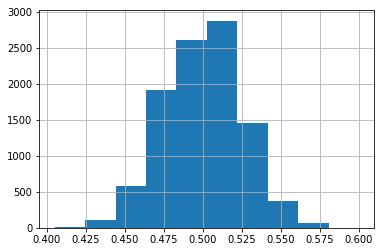

In [18]:
coin_flips = np.array([0,1])
num_flips = 400
repetitions = 10000

total_heads = np.array([])

for i in np.arange(repetitions):
    spins = np.random.choice(coin_flips, num_flips, replace=True)
    new_heads_sum = spins.mean()
    total_heads = np.append(total_heads, new_heads_sum)
pd.Series(total_heads).hist()

In [19]:
def coin_flip_sim(num_flips):
    total_heads = np.array([])

    for i in np.arange(repetitions):
        spins = np.random.choice(coin_flips, num_flips, replace=True)
        new_heads_sum = spins.mean()
        total_heads = np.append(total_heads, new_heads_sum)
    return total_heads

In [81]:
trace1 = {
  "x": [0,0.1,0.2,0.3,0.4],
  "opacity": 0.75, 
  "type": "histogram",
  "autobinx":False,
  "xbins":dict(
        start=0,
        end=1,
        size=0.1
    )
}
layout = go.Layout(
    xaxis=dict(
        range=[0, 1],
        fixedrange=True
    ),
    yaxis=dict(
        fixedrange=True
    )
)
data = Data([trace1])
fig = Figure(data=data,layout=layout)
plot_url = py.plot(fig)

In [82]:
g = GraphWidget('https://plot.ly/~calebs11/86')

In [83]:
style = {'description_width': 'initial'}
num_flips_slider = widgets.IntSlider(
    description='Num Coin Flps',
    value=500, 
    max=1000, 
    min=1, 
    style=style, )

In [84]:
current_sample = coin_flip_sim(num_flips_slider.value)

In [85]:
current_sample

array([ 0.492,  0.498,  0.516, ...,  0.498,  0.542,  0.518])

In [101]:
help(GraphWidget)

Help on class GraphWidget in module plotly.widgets.graph_widget:

class GraphWidget(ipywidgets.widgets.domwidget.DOMWidget)
 |  An interactive Plotly graph widget for use in IPython
 |  Notebooks.
 |  
 |  Method resolution order:
 |      GraphWidget
 |      ipywidgets.widgets.domwidget.DOMWidget
 |      ipywidgets.widgets.widget.Widget
 |      ipywidgets.widgets.widget.LoggingHasTraits
 |      traitlets.traitlets.HasTraits
 |      traitlets.traitlets.HasDescriptors
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, graph_url='https://plot.ly/~playground/7', **kwargs)
 |      Initialize a plotly graph widget
 |      
 |      Args:
 |          graph_url: The url of a Plotly graph
 |      
 |      Example:
 |          ```
 |          GraphWidget('https://plot.ly/~chris/3375')
 |          ```
 |  
 |  add_traces(self, traces, new_indices=None)
 |      Add new data traces to a graph.
 |      
 |      If `new_indices` isn't specified, they are simply appended.
 |

In [105]:
def update(change):
    global current_sample
    new_sample = coin_flip_sim(change['new'])
    g.restyle({'x': [new_sample], 'name': 'Coin Flip Average', 'type': 'histogram', 
                   'opacity': 0.75, "autobinx":False, "autobiny":False, "xbins":dict(
        start=0,
        end=1,
        size=0.01
    )})
    g.relayout({'xaxis.range': [0, 1], 'xaxis.fixedrange': True, 'yaxis.fixedrange': True})


In [103]:
num_flips_slider.unobserve_all()
num_flips_slider.observe(update, names='value')

In [104]:
display(num_flips_slider)
display(g)

A Jupyter Widget

A Jupyter Widget